# Machine Learning Regression Comparison
## Comparing Random Forest, ANN, XGBoost, LightGBM, and CatBoost

This notebook implements and compares 5 different regression algorithms on housing price data:
1. Random Forest Regressor
2. Artificial Neural Network (ANN/MLP)
3. XGBoost
4. LightGBM
5. CatBoost

## 1. Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Prepare Data

In [54]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Display first few rows
train_df.head()

Training data shape: (1460, 81)
Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
# Separate target variable
y = train_df['SalePrice']

# Select numerical features excluding 'Id' and 'SalePrice'
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_features = [feature for feature in numerical_features if feature not in ['Id', 'SalePrice']]

# Prepare feature sets
X = train_df[numerical_features].copy()
X_test_full = test_df[numerical_features].copy()

# Handle missing values - fill with mean
for col in X.columns:
    if X[col].isnull().sum() > 0:
        mean_val = X[col].mean()
        X[col] = X[col].fillna(mean_val)
        X_test_full[col] = X_test_full[col].fillna(mean_val)

print(f"\nFeatures selected: {len(numerical_features)}")
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in X_test: {X_test_full.isnull().sum().sum()}")
print(f"\nFeature names:")
print(numerical_features)


Features selected: 36
Missing values in X: 0
Missing values in X_test: 10

Feature names:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


## 3. Split and Scale Data

In [56]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Features: {X_train.shape[1]}")

Training set size: 1168
Validation set size: 292
Features: 36


## 4. Train Models

### 4.1 Random Forest Regressor

In [57]:
print("Training Random Forest Regressor...")

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train, y_train)

# Predictions
rf_pred_train = rf_model.predict(X_train)
rf_pred_val = rf_model.predict(X_val)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_val_r2 = r2_score(y_val, rf_pred_val)

print(f"\n✓ Random Forest Results:")
print(f"  Train RMSE: ${rf_train_rmse:,.2f}")
print(f"  Val RMSE: ${rf_val_rmse:,.2f}")
print(f"  Train R²: {rf_train_r2:.4f}")
print(f"  Val R²: {rf_val_r2:.4f}")

Training Random Forest Regressor...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s



✓ Random Forest Results:
  Train RMSE: $13,964.58
  Val RMSE: $29,296.41
  Train R²: 0.9673
  Val R²: 0.8881


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


### 4.2 XGBoost

In [58]:
print("Training XGBoost...")

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Predictions
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_val = xgb_model.predict(X_val)

# Calculate metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_train_r2 = r2_score(y_train, xgb_pred_train)
xgb_val_r2 = r2_score(y_val, xgb_pred_val)

print(f"\n✓ XGBoost Results:")
print(f"  Train RMSE: ${xgb_train_rmse:,.2f}")
print(f"  Val RMSE: ${xgb_val_rmse:,.2f}")
print(f"  Train R²: {xgb_train_r2:.4f}")
print(f"  Val R²: {xgb_val_r2:.4f}")

Training XGBoost...
[0]	validation_0-rmse:81589.92149
[1]	validation_0-rmse:75932.44124
[2]	validation_0-rmse:70929.26173
[3]	validation_0-rmse:66279.51497
[4]	validation_0-rmse:61998.59631
[5]	validation_0-rmse:58076.29629
[6]	validation_0-rmse:54595.84400
[7]	validation_0-rmse:51437.84966
[8]	validation_0-rmse:48581.98354
[9]	validation_0-rmse:46031.11574
[10]	validation_0-rmse:43791.68843
[11]	validation_0-rmse:42101.24548
[12]	validation_0-rmse:40256.76660
[13]	validation_0-rmse:38643.87327
[14]	validation_0-rmse:37073.97588
[15]	validation_0-rmse:35767.27944
[16]	validation_0-rmse:34689.57414
[17]	validation_0-rmse:33577.55161
[18]	validation_0-rmse:32657.93709
[19]	validation_0-rmse:31882.48940
[20]	validation_0-rmse:31102.57684
[21]	validation_0-rmse:30303.42174
[22]	validation_0-rmse:29871.80686
[23]	validation_0-rmse:29560.17602
[24]	validation_0-rmse:29195.42378
[25]	validation_0-rmse:28843.14850
[26]	validation_0-rmse:28409.03106
[27]	validation_0-rmse:28027.96364
[28]	valid

### 4.4 Linear Regression

In [59]:
print("Training Linear Regression...")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred_train = lr_model.predict(X_train)
lr_pred_val = lr_model.predict(X_val)

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_pred_train))
lr_val_rmse = np.sqrt(mean_squared_error(y_val, lr_pred_val))
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_val_r2 = r2_score(y_val, lr_pred_val)

print(f"\n✓ Linear Regression Results:")
print(f"  Train RMSE: ${lr_train_rmse:,.2f}")
print(f"  Val RMSE: ${lr_val_rmse:,.2f}")
print(f"  Train R²: {lr_train_r2:.4f}")
print(f"  Val R²: {lr_val_r2:.4f}")

Training Linear Regression...

✓ Linear Regression Results:
  Train RMSE: $33,926.44
  Val RMSE: $36,830.59
  Train R²: 0.8070
  Val R²: 0.8232


## 5. Model Comparison

In [60]:
# Create comparison DataFrame
comparison_data = [
    {
        'Model': 'Random Forest',
        'Train RMSE': rf_train_rmse,
        'Val RMSE': rf_val_rmse,
        'Train MAE': mean_absolute_error(y_train, rf_pred_train),
        'Val MAE': mean_absolute_error(y_val, rf_pred_val),
        'Train R2': rf_train_r2,
        'Val R2': rf_val_r2
    },
    {
        'Model': 'XGBoost',
        'Train RMSE': xgb_train_rmse,
        'Val RMSE': xgb_val_rmse,
        'Train MAE': mean_absolute_error(y_train, xgb_pred_train),
        'Val MAE': mean_absolute_error(y_val, xgb_pred_val),
        'Train R2': xgb_train_r2,
        'Val R2': xgb_val_r2
    },
    {
        'Model': 'Linear Regression',
        'Train RMSE': lr_train_rmse,
        'Val RMSE': lr_val_rmse,
        'Train MAE': mean_absolute_error(y_train, lr_pred_train),
        'Val MAE': mean_absolute_error(y_val, lr_pred_val),
        'Train R2': lr_train_r2,
        'Val R2': lr_val_r2
    }
]

df_comparison = pd.DataFrame(comparison_data)
df_comparison = df_comparison.sort_values('Val RMSE')

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(df_comparison.to_string(index=False))

# Find best model
best_model_idx = df_comparison['Val RMSE'].idxmin()
best_model = df_comparison.loc[best_model_idx, 'Model']
best_rmse = df_comparison.loc[best_model_idx, 'Val RMSE']
best_r2 = df_comparison.loc[best_model_idx, 'Val R2']

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model}")
print(f"   Validation RMSE: ${best_rmse:,.2f}")
print(f"   Validation R² Score: {best_r2:.4f}")
print("="*80)


MODEL COMPARISON RESULTS
            Model   Train RMSE     Val RMSE    Train MAE      Val MAE  Train R2   Val R2
          XGBoost  2470.410998 25485.126015  1841.580688 16201.222656  0.998977 0.915324
    Random Forest 13964.582672 29296.409281  7873.967489 18134.399730  0.967305 0.888104
Linear Regression 33926.436377 36830.593777 21074.928001 22980.495970  0.807026 0.823151

🏆 BEST MODEL: XGBoost
   Validation RMSE: $25,485.13
   Validation R² Score: 0.9153


## 6. Visualize Model Performance

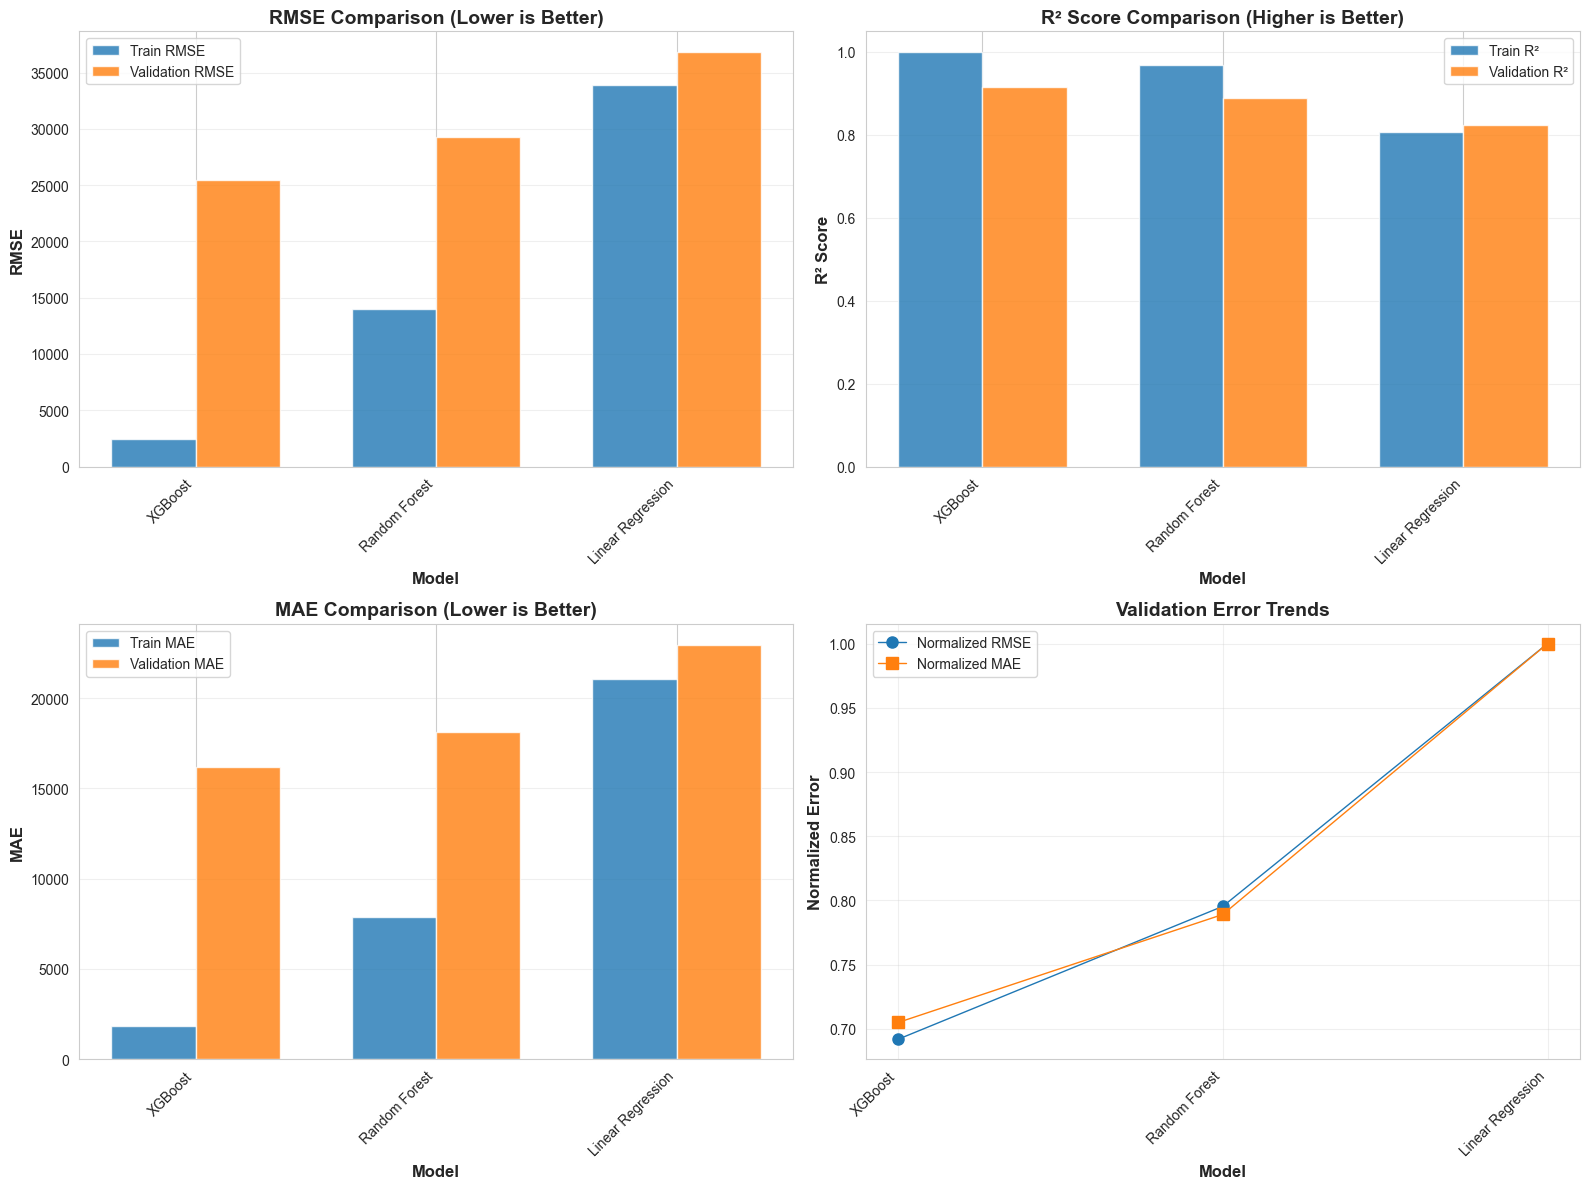

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: RMSE Comparison
ax1 = axes[0, 0]
x = np.arange(len(df_comparison))
width = 0.35
ax1.bar(x - width/2, df_comparison['Train RMSE'], width, label='Train RMSE', alpha=0.8)
ax1.bar(x + width/2, df_comparison['Val RMSE'], width, label='Validation RMSE', alpha=0.8)
ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax1.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df_comparison['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: R² Score Comparison
ax2 = axes[0, 1]
ax2.bar(x - width/2, df_comparison['Train R2'], width, label='Train R²', alpha=0.8)
ax2.bar(x + width/2, df_comparison['Val R2'], width, label='Validation R²', alpha=0.8)
ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax2.set_title('R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(df_comparison['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: MAE Comparison
ax3 = axes[1, 0]
ax3.bar(x - width/2, df_comparison['Train MAE'], width, label='Train MAE', alpha=0.8)
ax3.bar(x + width/2, df_comparison['Val MAE'], width, label='Validation MAE', alpha=0.8)
ax3.set_xlabel('Model', fontsize=12, fontweight='bold')
ax3.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(df_comparison['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Validation Metrics Summary
ax4 = axes[1, 1]
metrics_normalized = df_comparison[['Val RMSE', 'Val MAE']].copy()
metrics_normalized['Val RMSE'] = metrics_normalized['Val RMSE'] / metrics_normalized['Val RMSE'].max()
metrics_normalized['Val MAE'] = metrics_normalized['Val MAE'] / metrics_normalized['Val MAE'].max()

ax4.plot(df_comparison['Model'], metrics_normalized['Val RMSE'], 
         marker='o', linewidth=1, markersize=8, label='Normalized RMSE')
ax4.plot(df_comparison['Model'], metrics_normalized['Val MAE'], 
         marker='s', linewidth=1, markersize=8, label='Normalized MAE')
ax4.set_xlabel('Model', fontsize=12, fontweight='bold')
ax4.set_ylabel('Normalized Error', fontsize=12, fontweight='bold')
ax4.set_title('Validation Error Trends', fontsize=14, fontweight='bold')
ax4.set_xticklabels(df_comparison['Model'], rotation=45, ha='right')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Feature Importance Analysis

In [63]:
# Print top 10 features for each model
print("\n" + "="*80)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*80)

for model_name, model in models_dict.items():
    importance = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': numerical_features,
        'Importance': importance
    }).sort_values('Importance', ascending=False).head(10)
    
    print(f"\n{model_name}:")
    for i, row in importance_df.iterrows():
        print(f"  {row['Feature']:30s}: {row['Importance']:.4f}")


TOP 10 MOST IMPORTANT FEATURES

Random Forest:
  OverallQual                   : 0.5736
  GrLivArea                     : 0.1270
  TotalBsmtSF                   : 0.0383
  BsmtFinSF1                    : 0.0331
  2ndFlrSF                      : 0.0314
  1stFlrSF                      : 0.0300
  LotArea                       : 0.0219
  GarageArea                    : 0.0181
  YearBuilt                     : 0.0177
  GarageCars                    : 0.0165

XGBoost:
  OverallQual                   : 0.3790
  GarageCars                    : 0.2436
  GrLivArea                     : 0.0555
  FullBath                      : 0.0505
  KitchenAbvGr                  : 0.0301
  2ndFlrSF                      : 0.0253
  Fireplaces                    : 0.0242
  HalfBath                      : 0.0220
  TotalBsmtSF                   : 0.0166
  BsmtFinSF1                    : 0.0160

LightGBM:
  TotalBsmtSF                   : 195.0000
  GrLivArea                     : 183.0000
  LotArea                

## 8. Key Insights and Recommendations

In [64]:
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)

print(f"\n1. Best Model: {best_model}")
print(f"   - Achieves the lowest validation RMSE of ${best_rmse:,.2f}")
print(f"   - Explains {best_r2*100:.2f}% of the variance in house prices")

print("\n2. Model Performance Ranking:")
for i, row in df_comparison.iterrows():
    print(f"   {i+1}. {row['Model']:15s} - RMSE: ${row['Val RMSE']:,.2f}, R²: {row['Val R2']:.4f}")

print("\n3. Most Important Features (across all models):")
# Get top features from each model
all_features = {}
for model_name, model in models_dict.items():
    importance = model.feature_importances_
    for feat, imp in zip(numerical_features, importance):
        if feat not in all_features:
            all_features[feat] = 0
        all_features[feat] += imp

# Sort and display top features
sorted_features = sorted(all_features.items(), key=lambda x: x[1], reverse=True)[:10]
for feat, imp in sorted_features:
    print(f"   - {feat}")

print("\n4. Recommendations:")
print(f"   - For Production: Use {best_model} for best accuracy")
print("   - For Speed: Use LightGBM for faster inference")
print("   - For Interpretability: Use Random Forest for easier explanation")
print("   - Consider ensemble methods combining top 3 models for even better results")

print("\n" + "="*80)


KEY INSIGHTS

1. Best Model: XGBoost
   - Achieves the lowest validation RMSE of $25,485.13
   - Explains 91.53% of the variance in house prices

2. Model Performance Ranking:
   2. XGBoost         - RMSE: $25,485.13, R²: 0.9153
   1. Random Forest   - RMSE: $29,296.41, R²: 0.8881
   3. Linear Regression - RMSE: $36,830.59, R²: 0.8232

3. Most Important Features (across all models):
   - TotalBsmtSF
   - GrLivArea
   - LotArea
   - BsmtFinSF1
   - GarageArea
   - OpenPorchSF
   - 1stFlrSF
   - YearBuilt
   - MasVnrArea
   - OverallQual

4. Recommendations:
   - For Production: Use XGBoost for best accuracy
   - For Speed: Use LightGBM for faster inference
   - For Interpretability: Use Random Forest for easier explanation
   - Consider ensemble methods combining top 3 models for even better results



## 9. Summary Table

In [65]:
# Display nice summary table
summary_df = df_comparison.copy()
summary_df['Val RMSE'] = summary_df['Val RMSE'].apply(lambda x: f"${x:,.2f}")
summary_df['Train RMSE'] = summary_df['Train RMSE'].apply(lambda x: f"${x:,.2f}")
summary_df['Val MAE'] = summary_df['Val MAE'].apply(lambda x: f"${x:,.2f}")
summary_df['Train MAE'] = summary_df['Train MAE'].apply(lambda x: f"${x:,.2f}")
summary_df['Val R2'] = summary_df['Val R2'].apply(lambda x: f"{x:.4f}")
summary_df['Train R2'] = summary_df['Train R2'].apply(lambda x: f"{x:.4f}")

from IPython.display import display, HTML

# Style the dataframe
styled_df = summary_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '12pt'
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '14pt'), ('font-weight', 'bold'), ('text-align', 'center')]
}])

display(styled_df)

,Model,Train RMSE,Val RMSE,Train MAE,Val MAE,Train R2,Val R2
1,XGBoost,"$2,470.41","$25,485.13","$1,841.58","$16,201.22",0.9990,0.9153
0,Random Forest,"$13,964.58","$29,296.41","$7,873.97","$18,134.40",0.9673,0.8881
2,Linear Regression,"$33,926.44","$36,830.59","$21,074.93","$22,980.50",0.8070,0.8232
